In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('data/BMW sales data (2010-2024) (1).csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [90]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [91]:
df.describe(include='all')

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


Asia leads in BMW sales frequency, and the 7 Series is the most listed model.
But we’ll confirm this quantitatively using grouped analysis.

## EDA

### Identify top models and region by sales

In [92]:
model_sales = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False)
model_sales

Model
7 Series    23786466
i8          23423891
X1          23406060
3 Series    23281303
i3          23133849
5 Series    23097519
M5          22779688
X3          22745529
X5          22709749
X6          22661986
M3          22349694
Name: Sales_Volume, dtype: int64

The small spread (≈ 1 million units between top 5 models) suggests balanced sales distribution across BMW’s portfolio

C:\Users\Caleb\AppData\Local\Temp\ipykernel_11460\2361506198.py:7: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Caleb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


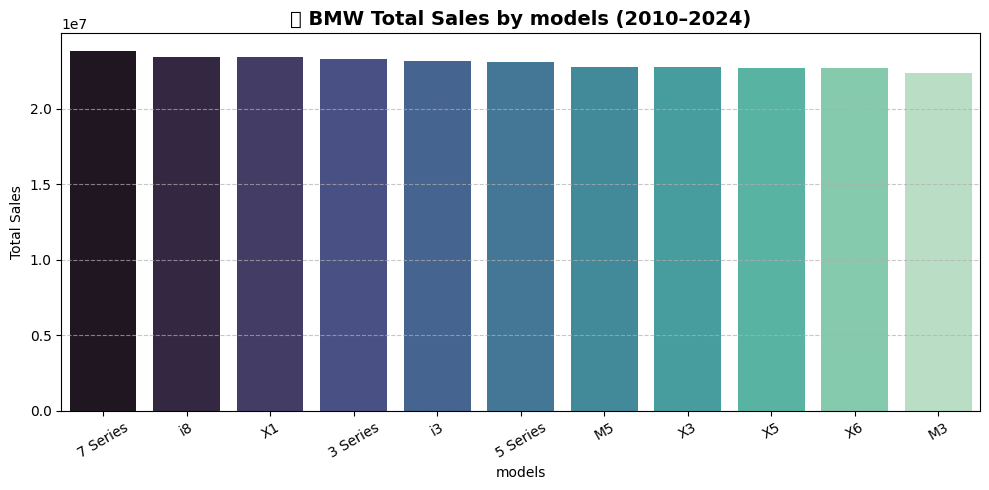

In [93]:
plt.figure(figsize=(10,5))
sns.barplot(x=model_sales.index,y=model_sales.values,palette='mako',hue=model_sales.index,legend=False)
plt.title("💰 BMW Total Sales by models (2010–2024)", fontsize=14, weight="bold")
plt.xlabel("models")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [94]:
region_sales = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)
region_sales

Region
Asia             42974277
Europe           42555138
North America    42402629
Middle East      42326620
Africa           41565252
South America    41551818
Name: Sales_Volume, dtype: int64

Asia narrowly leads global BMW sales, showing explosive demand growth — likely driven by China, India, and Southeast Asia.

C:\Users\Caleb\AppData\Local\Temp\ipykernel_11460\3049894980.py:7: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Caleb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


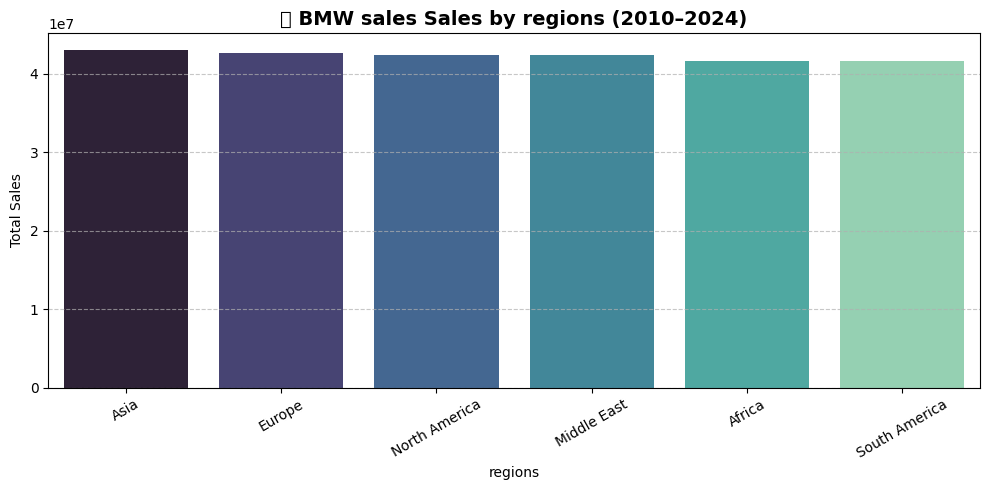

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x=region_sales.index,y=region_sales.values,palette='mako',hue=region_sales.index,legend=False)
plt.title("💰 BMW sales Sales by regions (2010–2024)", fontsize=14, weight="bold")
plt.xlabel("regions")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### price trend by region 

In [96]:
region_price = df.groupby('Region')['Price_USD'].sum().sort_values(ascending=False)
region_price

Region
Asia             638741336
North America    625708906
Middle East      625687400
Europe           624952966
South America    618607164
Africa           618032273
Name: Price_USD, dtype: int64

### Fuel type to sales

In [97]:
feul_type_sales = df.groupby('Fuel_Type')['Sales_Volume'].sum().sort_values(ascending=False)
feul_type_sales

Fuel_Type
Hybrid      64532097
Petrol      63324154
Electric    63157665
Diesel      62361818
Name: Sales_Volume, dtype: int64

C:\Users\Caleb\AppData\Local\Temp\ipykernel_11460\2780288136.py:10: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Caleb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


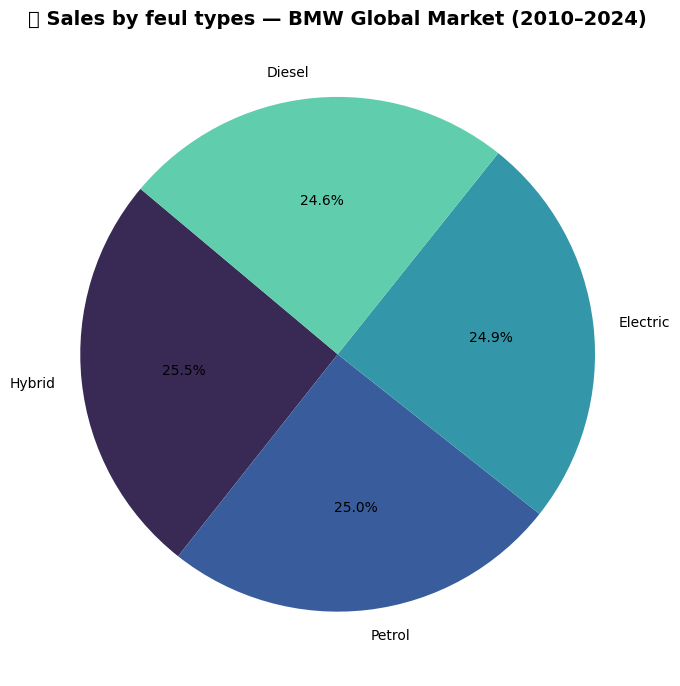

In [98]:
plt.figure(figsize=(7,7))
plt.pie(
    feul_type_sales.values,
    labels=feul_type_sales.index,
    startangle=140,
    autopct='%1.1f%%',
    colors=sns.color_palette("mako", len(feul_type_sales))
)
plt.title("🌍 Sales by feul types — BMW Global Market (2010–2024)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

## BMW Regional Revenue Analysis (2010–2024)

C:\Users\Caleb\AppData\Local\Temp\ipykernel_11460\691796204.py:7: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Caleb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


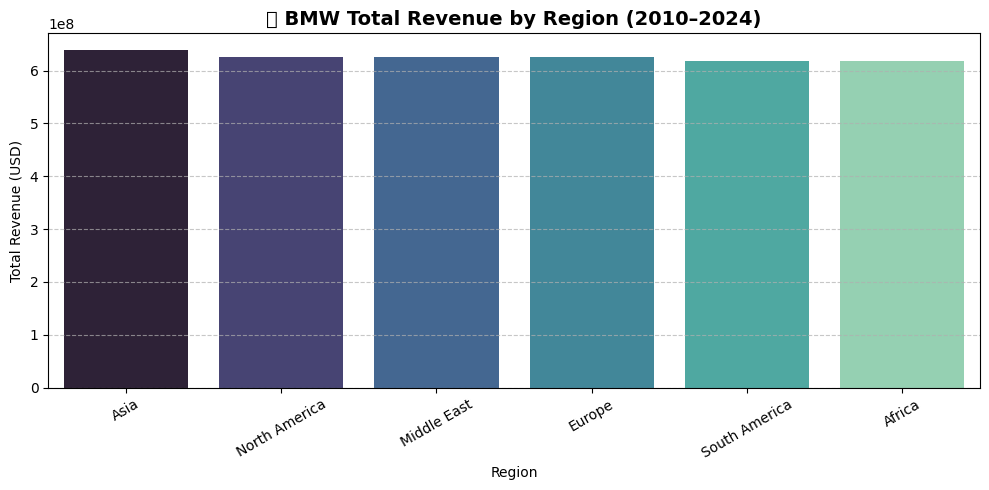

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x=region_price.index,y=region_price.values,palette='mako',hue=region_price.index,legend=False)
plt.title("💰 BMW Total Revenue by Region (2010–2024)", fontsize=14, weight="bold")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Caleb\AppData\Local\Temp\ipykernel_11460\608084707.py:10: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Caleb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


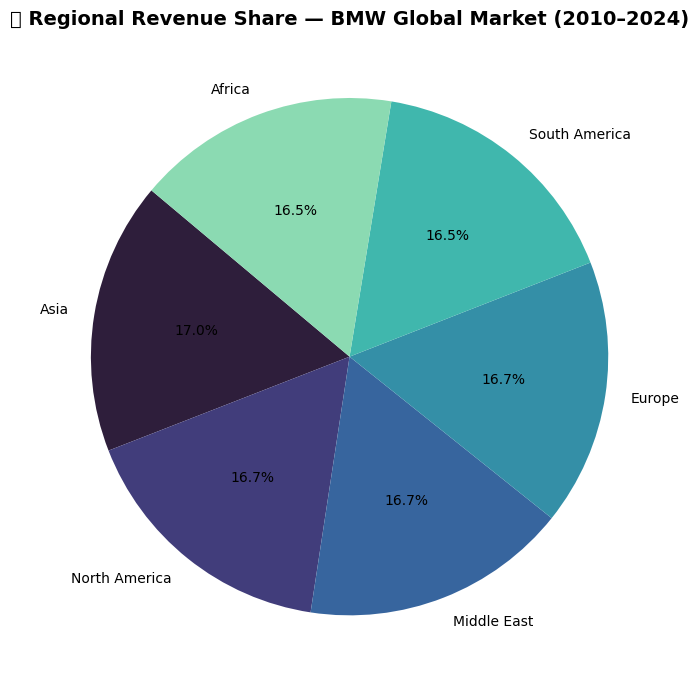

In [100]:
plt.figure(figsize=(7,7))
plt.pie(
    region_price.values,
    labels=region_price.index,
    startangle=140,
    autopct='%1.1f%%',
    colors=sns.color_palette("mako", len(region_price))
)
plt.title("🌍 Regional Revenue Share — BMW Global Market (2010–2024)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

- Asia again takes the lead in total revenue (~ 639M ), followed closely by North America and Europe.
- The Middle East’s near-equal contribution suggests high unit prices and luxury model demand.
- South America and Africa, though lower in total, still show solid participation — indicating BMW’s emerging market expansion.
- The minimal spread (≈$20M between regions) reinforces BMW’s balanced global pricing and revenue strategy.

## Model vs. Average Price Analysis

In [101]:
model_price = df.groupby('Model')['Price_USD'].sum().sort_values(ascending=False)
model_price

Model
7 Series    352610538
3 Series    347226845
i8          347137044
5 Series    345721780
i3          345427638
X1          343948341
X3          337349726
X5          335215320
M5          333498741
X6          333318141
M3          330275931
Name: Price_USD, dtype: int64

C:\Users\Caleb\AppData\Local\Temp\ipykernel_11460\1675731207.py:12: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Caleb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


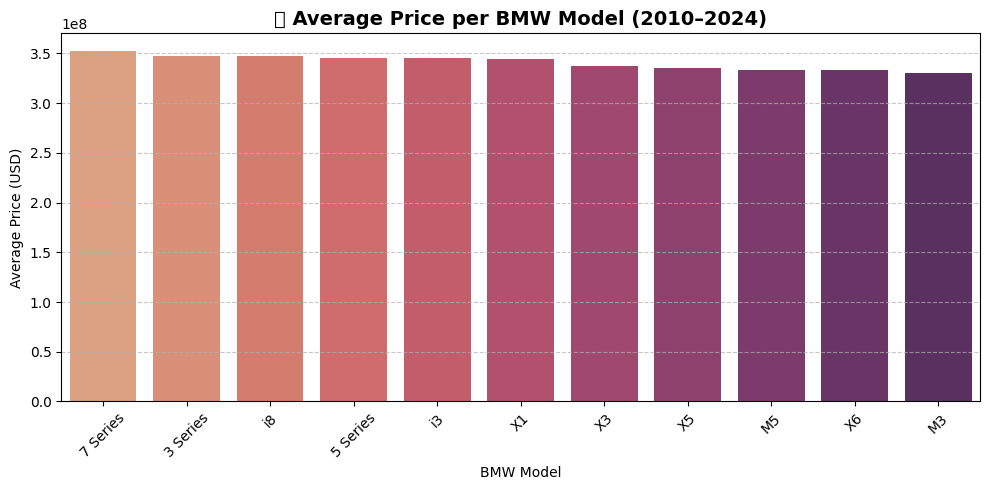

In [102]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=model_price.index,y=model_price,
    palette='flare',hue=model_price.index,legend=False
)

plt.title("💎 Average Price per BMW Model (2010–2024)", fontsize=14, weight="bold")
plt.xlabel("BMW Model")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Caleb\AppData\Local\Temp\ipykernel_11460\3857249921.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Caleb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


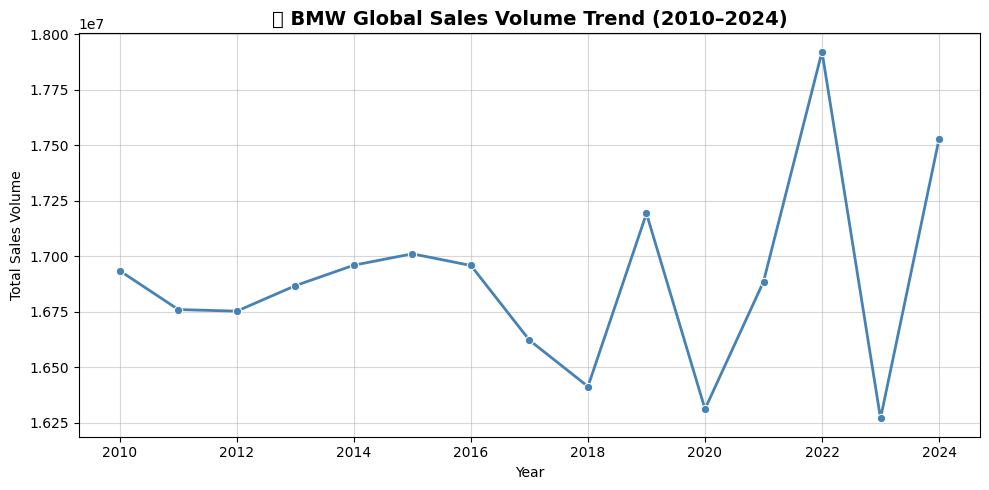

In [103]:
yearly_sales = df.groupby("Year")["Sales_Volume"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker="o", linewidth=2, color="steelblue")
plt.title("📈 BMW Global Sales Volume Trend (2010–2024)", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()